# Supermarket Sales Forecasting

In [2]:
import pandas as pd
import numpy as np

# We will work on a case to explore and extract some interesting insight about the dataset



In [3]:
df = pd.read_csv("VendasSupermercados+CDI.csv")

In [4]:
df.head()

,Date;VendasSupermercados;CDI
0,2010-01-01;76.39 ;0.66
1,2010-02-01;73.95 ;0.59
2,2010-03-01;81.69 ;0.76
3,2010-04-01;77.91 ;0.66
4,2010-05-01;78.66 ;0.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 1 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date;VendasSupermercados;CDI  164 non-null    object
dtypes: object(1)
memory usage: 1.4+ KB


- As we can see above, the data contains only one columns, and it is a mix of three different features.
- It would be tbeter then, to split the second column in three.
- To do so, we will implement a loop that will split the information were the ";" symbol shows up

In [6]:
split_features = df['Date;VendasSupermercados;CDI'].str.split(';', expand=True) 

In [72]:
split_features.head()

,Date,VendasSupermercados,CDI,year,month,day,dayofweek,quarter,Trend
0,2010-01-01,76.39,0.66,2010,1,1,4,1,84.331738
1,2010-02-01,73.95,0.59,2010,2,1,0,1,84.442279
2,2010-03-01,81.69,0.76,2010,3,1,0,1,84.542123
3,2010-04-01,77.91,0.66,2010,4,1,3,2,84.652664
4,2010-05-01,78.66,0.75,2010,5,1,5,2,84.759639


In [8]:
split_features.columns = ['Date','VendasSupermercados','CDI']

df_new = split_features

In [9]:
df_new.head()

,Date,VendasSupermercados,CDI
0,2010-01-01,76.39,0.66
1,2010-02-01,73.95,0.59
2,2010-03-01,81.69,0.76
3,2010-04-01,77.91,0.66
4,2010-05-01,78.66,0.75


- Now we have a dataframe with three different columns, we can start to analyse the data in it independently.
- It can be good too to convert the Date into the Date format and the other features to the numerical format.

In [10]:
df_new['VendasSupermercados'] = df_new['VendasSupermercados'].str.strip()

In [11]:
df_new['Date'] = pd.to_datetime(df_new['Date'])

#df.set_index('Date', inplace=True)

df_new['VendasSupermercados'] = pd.to_numeric(df_new['VendasSupermercados'])

df_new['CDI'] = pd.to_numeric(df_new['CDI'])

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 164 non-null    datetime64[ns]
 1   VendasSupermercados  164 non-null    float64       
 2   CDI                  164 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.0 KB


In [12]:
# Lets check for null values

df_new.isnull().sum()

Date                   0
VendasSupermercados    0
CDI                    0
dtype: int64

-The data do not posses any missing value, which is excelent. We will not need to implement any strategy to erase or fulfill the data
- It is also a good ideia to search for outliers. The presence of outliers can have an impact on our analysis and then our strategy. There are many ways to search for missing values, but I like to implement boxplots
- Sure, for now, the only features that will make sense to create a box plot from it are the "VendasSupermercados" and "CDI".

# Data Visualisation

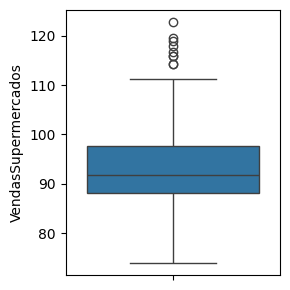

In [77]:
# We will start the Data Vis section by importing the libraries 

import seaborn as sns

import matplotlib.pyplot as plt

#Set up the size of the plots

plt.figure(figsize=(3,3))

sns.boxplot(y=df_new.iloc[:, 1])
plt.ylabel("VendasSupermercados")
    
plt.tight_layout()
plt.show()
    





- The external points in the box plot reveal the existence of some outliers in the dataframe. 

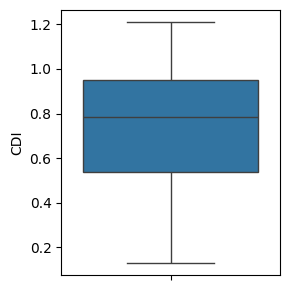

In [78]:
plt.figure(figsize=(3,3))

sns.boxplot(y=df_new.iloc[:, 2])
plt.ylabel("CDI")
    
plt.tight_layout()
plt.show()
    

- All the data is rounded and balanced, we can move on with the exploratory analysis. 

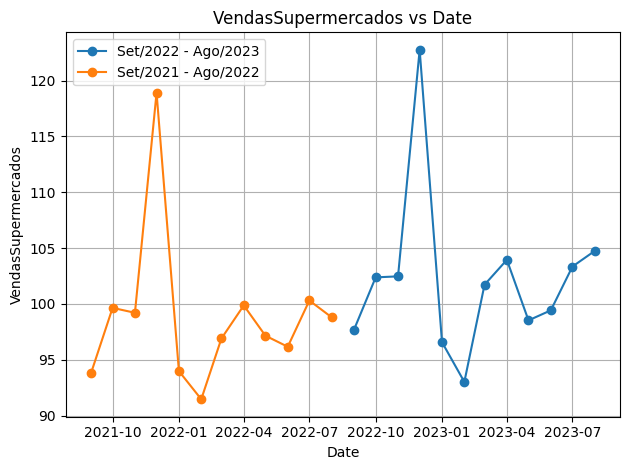

In [15]:

# So, let's plot the results for the last 12 months 
start_date_1 = '2022-09-01'
end_date_1 = '2023-08-31'
filtered_df_1 = df_new[(df_new['Date'] >= start_date_1) & (df_new['Date'] <= end_date_1)]


start_date_2 = '2021-09-01'
end_date_2 = '2022-08-31'
filtered_df_2 = df_new[(df_new['Date'] >= start_date_2) & (df_new['Date'] <= end_date_2)]


plt.plot(filtered_df_1['Date'], filtered_df_1['VendasSupermercados'], marker='o', linestyle='-', label = 'Set/2022 - Ago/2023')

plt.plot(filtered_df_2['Date'], filtered_df_2['VendasSupermercados'], marker='o', linestyle='-', label = 'Set/2021 - Ago/2022')


plt.title('VendasSupermercados vs Date')
plt.xlabel('Date')
plt.ylabel('VendasSupermercados')
plt.grid(True)

plt.legend()


plt.tight_layout()
plt.show()

- As it is clear in plots above, there is a seasonality in the data, which is easy to see by the presence of the maximum in the curves in both lines and also in the previous plot considering all the years between 2010 and 2024  
- The blue curve do seens like an increase in sales in the last 12 months. We can quantify it by comparing the total sales from one period to another.
- To do so, we will compute the increasing_in_sales = (total_sales_new - total_sales_older)/total_sales_older 

In [16]:
total_sales_new = filtered_df_1['VendasSupermercados'].sum()

total_sales_older = filtered_df_2['VendasSupermercados'].sum()

In [17]:
#then, the percentage of increasiment in sales are given by:

increasing_in_sales = (total_sales_new - total_sales_older)/total_sales_older 

print('Growth in sales: {:.2f}%'.format(increasing_in_sales*100))


Growth in sales: 3.41%


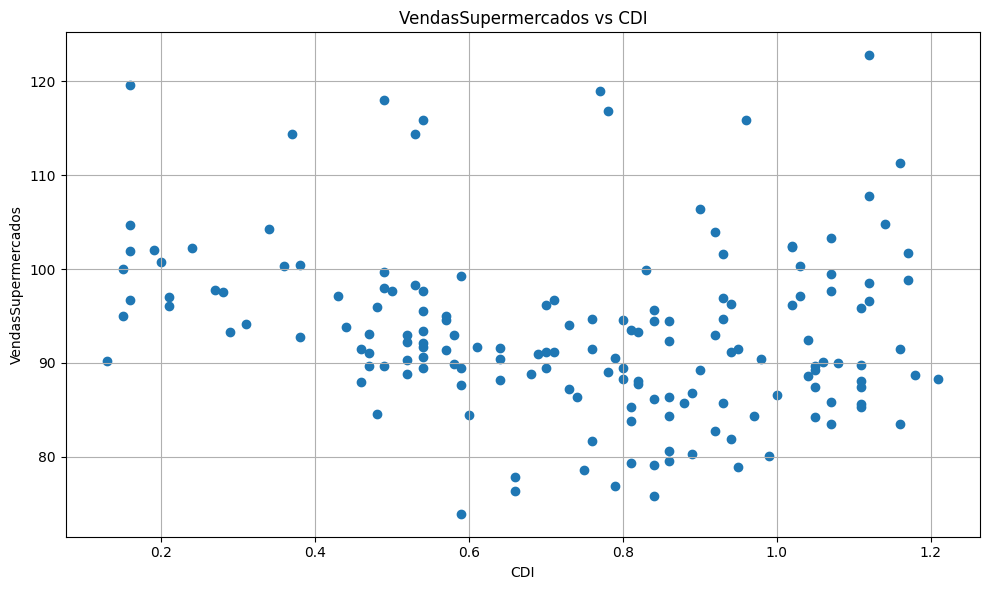

In [18]:
# Let's see how the VendasSupermercados relate with the CDI

plt.figure(figsize=(10, 6))
plt.scatter(df_new['CDI'], df_new['VendasSupermercados'], marker='o')
plt.title('VendasSupermercados vs CDI')
plt.xlabel('CDI')
plt.ylabel('VendasSupermercados')
plt.grid(True)
plt.tight_layout()
plt.show()

- By performing the scatter plot, no strong pattern is easily revealed. 

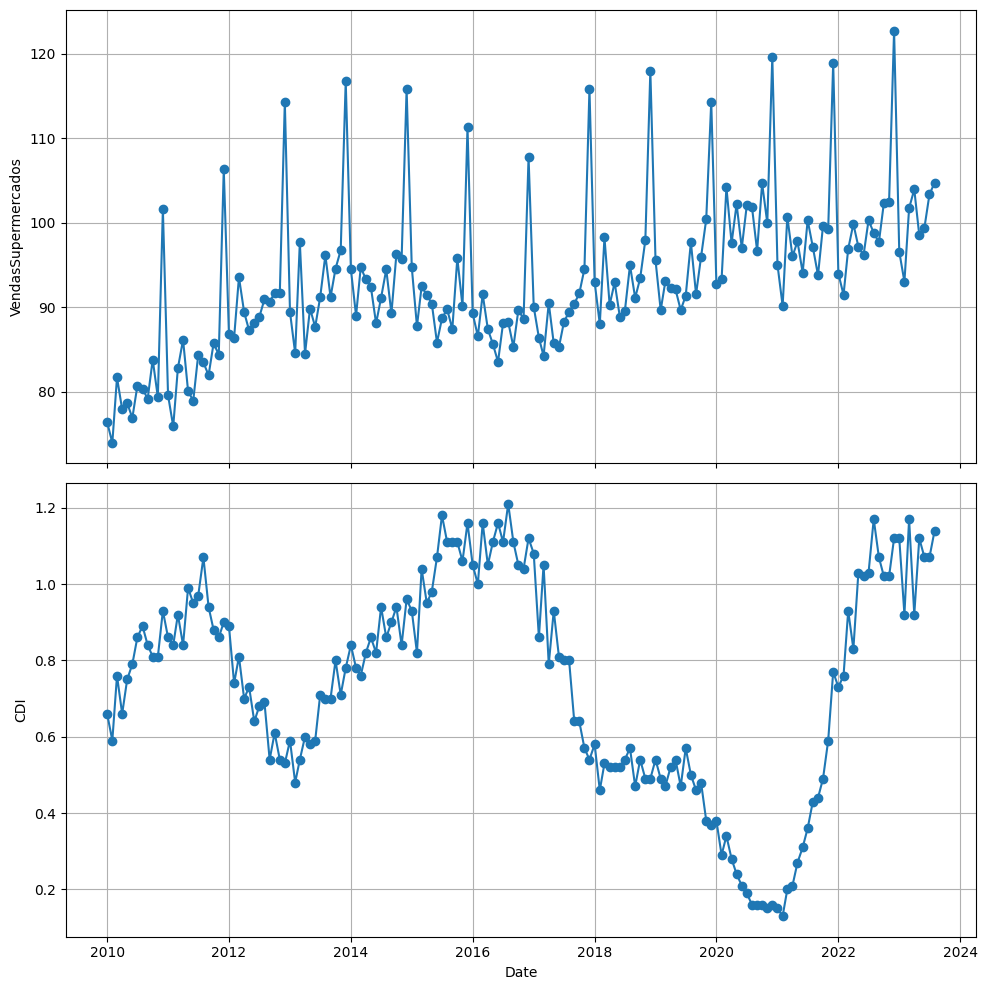

In [19]:

# figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

ax1.plot(df_new['Date'], df_new['VendasSupermercados'], marker='o', linestyle='-')
ax1.set_ylabel('VendasSupermercados')
ax1.grid(True)

ax2.plot(df_new['Date'], df_new['CDI'], marker='o', linestyle='-')
ax2.set_xlabel('Date')
ax2.set_ylabel('CDI')
ax2.grid(True)

# Adjusting the layout 
plt.tight_layout()
plt.show()

 We can look for any linear correlation queckly by computing the Pearson Correlation between the features

In [20]:

# Computing the Pearson Correlation
df_new['VendasSupermercados'].corr(df_new['CDI'])

-0.18544464167698987

- As the value of the correlatin is negative, it shows that the linear correlation of the variable is not so strong, but still a negative linear correlation. We can perform more investigations to see if there are better methods to analyse this correlation.
- We will then utilize the Spearman's rank correlation coefficient (SRCC). By applying the SRCC method, we will be able to analyse the monotonic relationship (MR) between the variables.
- If the MR coefficient is equal to 1, then the variables presents a perfect positive MR, which indicate that if the one feature increase, the other one will also increase. If the MR coefficent is equal to -1, then  the features presents a perfect negative MR. 0 would indicate no MR between the features
- It is also good to compute the p-value, in order to guarantee that there is in fact a MR between the variables (which happens for p-value <0.05).

In [21]:
from scipy.stats import spearmanr

rho, p_value = spearmanr(df_new['VendasSupermercados'], df_new['CDI'])

print("Spearman's correlation coeff:", rho)

print("p-value:", p_value)


Spearman's correlation coeff: -0.21076432298397954
p-value: 0.006749562671541958


- The value of the spearman correlation indicates a weak negative MR, and the p-value ensure the existece of MR between the variables. 

# Feature Engineering for model training
- We will start to prepare the data to be more treatable for ML models.
- Some important modifications in the features can enhance the models learning.
- Said so, we will do, for now, some straightforward Feature Engineering to prepare the data in order to be possible to extract more information from it.  

In [22]:
# We will start by introducing more important features to the analysis 

df_new['year'] = df_new['Date'].dt.year

df_new['month'] = df_new['Date'].dt.month

df_new['day'] = df_new['Date'].dt.day

df_new['dayofweek'] = df_new['Date'].dt.dayofweek

#We will add the seasonality behavior in the dataset in a more explicit form

df_new['quarter'] = df_new['Date'].dt.quarter

# We will include the trend bhavior in the dataset 

from sklearn.linear_model import LinearRegression

lr= LinearRegression()

trends = lr.fit(pd.to_numeric(df_new['Date']).values.reshape(-1,1), df_new['VendasSupermercados'])

df_new['Trend'] = trends.predict(pd.to_numeric(df_new['Date']).values.reshape(-1,1))



In [23]:
df_new.tail(1)

,Date,VendasSupermercados,CDI,year,month,day,dayofweek,quarter,Trend
163,2023-08-01,104.75,1.14,2023,8,1,1,3,102.018312


In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 164 non-null    datetime64[ns]
 1   VendasSupermercados  164 non-null    float64       
 2   CDI                  164 non-null    float64       
 3   year                 164 non-null    int32         
 4   month                164 non-null    int32         
 5   day                  164 non-null    int32         
 6   dayofweek            164 non-null    int32         
 7   quarter              164 non-null    int32         
 8   Trend                164 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(5)
memory usage: 8.5 KB


# Training the models

In [25]:
# Now we will train a ML model to forecast supermarket sales
#As usual, we must remove the datetime format data from the dataset.
#in order to do not have any problem with the ML model training 
#As the temporal organization fo the data is important, we need to split it following the chronological order

#Let's analyse the data with two backtests

split_date_low = '2013-02-01'

split_date_high = '2023-02-01'

split_date_middle = '2023-05-01'


train_data = df_new[(df_new['Date'] >= split_date_low) & (df_new['Date'] < split_date_high)]

test_data_1 = df_new[(df_new['Date']>= split_date_high) & (df_new['Date'] <= split_date_middle)]

test_data_2 = df_new[df_new['Date']>= split_date_high]



X_train=train_data.drop(['VendasSupermercados','Date','day','dayofweek','CDI','quarter'], axis=1)

y_train=train_data['VendasSupermercados']

X_test1=test_data_1.drop(['VendasSupermercados','Date','day','dayofweek','CDI','quarter'], axis=1)

y_test1=test_data_1['VendasSupermercados']

X_test2=test_data_2.drop(['VendasSupermercados','Date','day','dayofweek','CDI','quarter'], axis=1)

y_test2=test_data_2['VendasSupermercados']




In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 37 to 156
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    120 non-null    int32  
 1   month   120 non-null    int32  
 2   Trend   120 non-null    float64
dtypes: float64(1), int32(2)
memory usage: 2.8 KB


In [27]:
# Now we will train three different models to see the result their MAPE

from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor 

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import RandomizedSearchCV,TimeSeriesSplit, cross_val_score, GridSearchCV

from sklearn.metrics import make_scorer



#optuna

#Lets utilize the timeseriessplit to create multiple splits respecting the time order
tscv = TimeSeriesSplit(n_splits = 5)

rf = RandomForestRegressor(random_state=1)

xgb = XGBRegressor()

dt = DecisionTreeRegressor(random_state=1)


#and its potential hyperparameters

# Parameter grid for RandomForestRegressor
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Parameter grid for XGBRegressor
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2]
}

# Parameter grid for DecisionTreeRegressor
dt_param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [28]:
# Let's define a custom MAPE scoring function
def mape_score(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# And define a scorer 

mape_scorer = make_scorer(mape_score)

In [29]:
grid_search_rf = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=tscv, scoring= mape_scorer, verbose=1)
grid_search_rf.fit(X_train, y_train)


best_rf = grid_search_rf.best_estimator_

# Print the best parameters found
print("Best parameters for rf found:")
print(grid_search_rf.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


Best parameters for rf found:
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}


In [30]:
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=tscv, scoring= mape_scorer, verbose=1)
grid_search_xgb.fit(X_train, y_train)


best_xgb = grid_search_xgb.best_estimator_

# Print the best parameters found
print("Best parameters for xgb found:")
print(grid_search_xgb.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for xgb found:
{'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}


In [31]:
grid_search_dt = GridSearchCV(estimator=dt, param_grid=dt_param_grid, cv=tscv, scoring= mape_scorer, verbose=1)
grid_search_dt.fit(X_train, y_train)


best_dt = grid_search_dt.best_estimator_

# Print the best parameters found
print("Best parameters for dt found:")
print(grid_search_dt.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for dt found:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


### Random Forest Regressor

In [32]:
cv = cross_val_score(rf, X_train, y_train, cv=tscv, scoring = mape_scorer)

print(cv)

print(cv.mean())

[3.12694417 2.47865254 2.48911353 5.01548539 1.89937804]
3.0019147312565044


### XGBoost Regressor

In [33]:
cv = cross_val_score(xgb, X_train, y_train,cv=tscv, scoring = mape_scorer)

print(cv)

print(cv.mean())

[3.09066188 2.1757614  2.19787842 5.16021501 1.85184487]
2.895272316733382


### Decision Tree Regressor

In [34]:
cv = cross_val_score(dt, X_train, y_train,cv=tscv, scoring = mape_scorer)

print(cv)

print(cv.mean())

[3.35303505 2.90156996 2.66620276 4.824274   2.48702989]
3.2464223312500566


- As we can see above, the performance for the DT was not good as the one from the XGB and RF. This is an expected result, since the DT model is simplier and we didn't specified the hyperparameters for a better performance of the model. 
- After applying the GridSearchCV, we did not find any performance improvement. So, in the current version, we choosed to keep the models with it's standard hyperparameters.   

### Voting Regressor

In [35]:
#I consider a good strategy to utilize the VotingRegressor and mix some other models training
from sklearn.ensemble import VotingRegressor

weigths = [0.4,0.5,0.1]

vot_reg = VotingRegressor(estimators = [('rf',rf),('xgb',xgb),('dt',dt)], weights = weigths) 

In [36]:
cv = cross_val_score(vot_reg,X_train,y_train,cv=tscv, scoring = mape_scorer)

print(cv)

print(cv.mean())

[2.90639062 2.30218493 2.23748825 5.03707269 1.77275976]
2.8511792496041664


In [37]:
# Now, let's train our model

vot_reg.fit(X_train,y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor(random_state=1)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=No...
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('dt', DecisionTreeRegressor(random_state=1))],
                weights=[0.4, 0.5, 0.1])

In [38]:
# and make our predction using the testset

y_pred_test = vot_reg.predict(X_test1)

test_mape = mape_score(y_test1, y_pred_test)

y_pred_test2 = vot_reg.predict(X_test2)

test2_mape = mape_score(y_test2, y_pred_test2)

print("MAPE on first backtest (3 months) {:.2f}%" .format(test_mape))

print("MAPE on Second backtest (6 months) {:.2f}%" .format(test2_mape))



MAPE on first backtest (3 months) 2.25%
MAPE on Second backtest (6 months) 2.43%


- Our backtests present a good MAPE (less than 5%), which indicate an excelent model's performance  

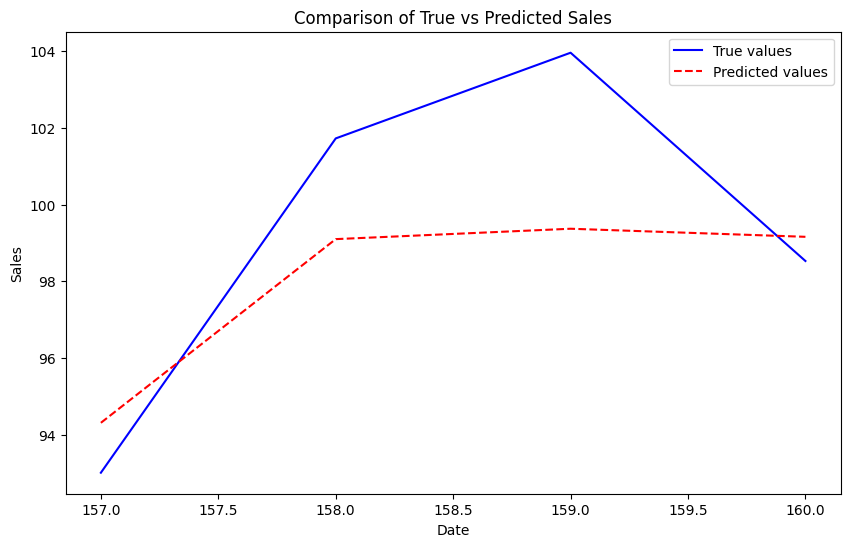

In [39]:
# Plot true values (y_test) versus predicted values (y_pred)
plt.figure(figsize=(10, 6))
plt.plot(y_test1.index, y_test1, label='True values', color='blue')
plt.plot(y_test1.index, y_pred_test, label='Predicted values', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Comparison of True vs Predicted Sales')
plt.legend()
plt.show()

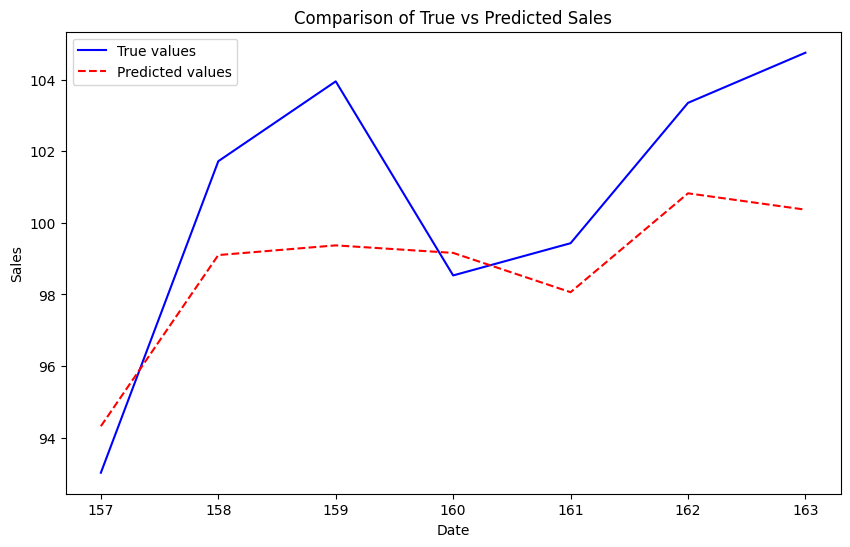

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(y_test2.index, y_test2, label='True values', color='blue')
plt.plot(y_test2.index, y_pred_test2, label='Predicted values', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Comparison of True vs Predicted Sales')
plt.legend()
plt.show()

In [41]:

train = df_new[(df_new['Date'] >= split_date_low) & (df_new['Date'] < split_date_high)]

valid = df_new[df_new['Date']>= split_date_high]

valid['Pred2'] = y_pred_test2


/tmp/ipykernel_194788/3177895364.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Pred2'] = y_pred_test2


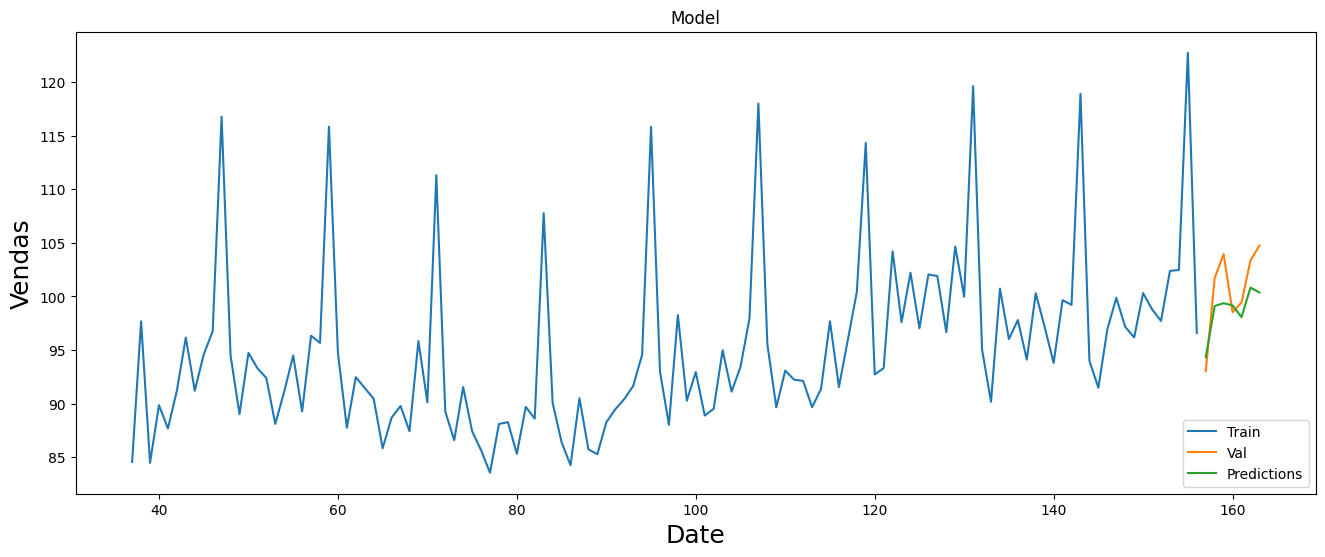

In [42]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Vendas',fontsize=18)
plt.plot(train['VendasSupermercados'])
plt.plot(valid[['VendasSupermercados','Pred2']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

### Forecasting 12 months ahead

In [43]:
# Now, we will train the model with the full dataset to make a forecasting of 12 months ahead. 


total_train_data = df_new[df_new['Date'] >= split_date_low]

X_train_tot=train_data.drop(['VendasSupermercados','Date','day','dayofweek','CDI','quarter'], axis=1)

y_train_tot=train_data['VendasSupermercados']

vot_reg.fit(X_train,y_train)




VotingRegressor(estimators=[('rf', RandomForestRegressor(random_state=1)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=No...
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('dt', DecisionTreeRegressor(random_state=1))],
                weights=[0.4, 0.5, 0.1])

In [44]:
#Now, we create the X_train data for 12 months ahead

from datetime import datetime, timedelta

final_date = df_new['Date'].max()

# Add 12 months to the final date 
forecast_period = final_date + pd.DateOffset(months=12)

# New dataframe
forecast_dates = pd.date_range(start=final_date + pd.DateOffset(days=1), end=forecast_period, freq='MS')

# Extract the year and month 
forecast_years = forecast_dates.year
forecast_months = forecast_dates.month

# Use the linear regression model to predict the trend for the new dates
forecast_trends = trends.predict(pd.to_numeric(forecast_dates).values.reshape(-1, 1))

# Creating the X_forecasting DataFrame
X_fct = pd.DataFrame({
    'year': forecast_years,
    'month': forecast_months,
    'Trend': forecast_trends
})

In [64]:
final_date

Timestamp('2023-08-01 00:00:00')

In [45]:
X_fct.head()

,year,month,Trend
0,2023,9,102.128853
1,2023,10,102.235828
2,2023,11,102.346369
3,2023,12,102.453345
4,2024,1,102.563886


In [46]:

#Pred of 12 months ahead
y_pred_fct = vot_reg.predict(X_fct)


In [47]:
# Let's transform the pred in a Dataframe to join it with the X_fct 
y_pred_fct = pd.DataFrame(y_pred_fct, columns=['Predicted'])

df_ahead = pd.concat([X_fct,y_pred_fct], axis=1)

df_ahead["Date"] = pd.to_datetime(df_ahead[['year','month']].assign(day=1))

df_ahead.head()

,year,month,Trend,Predicted,Date
0,2023,9,102.128853,99.240059,2023-09-01
1,2023,10,102.235828,102.372697,2023-10-01
2,2023,11,102.346369,102.328334,2023-11-01
3,2023,12,102.453345,122.137041,2023-12-01
4,2024,1,102.563886,96.168541,2024-01-01


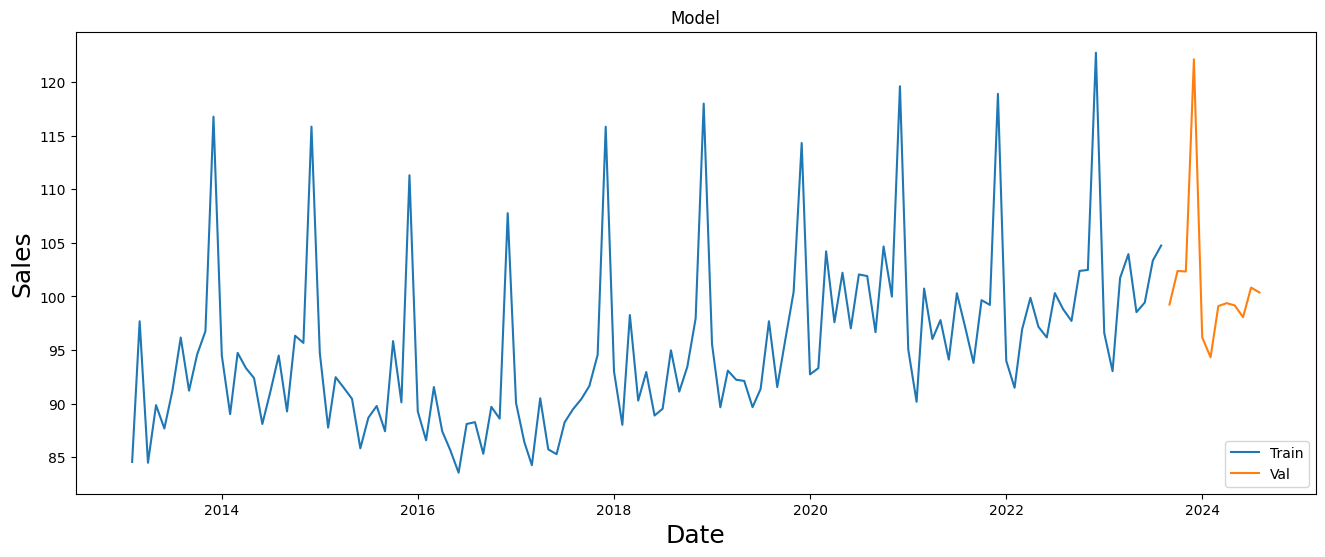

In [48]:
#Plot the current train data with the predictions 
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Sales',fontsize=18)
plt.plot(total_train_data['Date'],total_train_data['VendasSupermercados'])
plt.plot(df_ahead['Date'],df_ahead["Predicted"])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

- and this is our forecast for sales considering the next 12 months.  

## Now we are ready to Deploy the model

- We will deploy this model using the Streamlit.
- As a demo, the users would be able to set the number of months ahead the final date of the data and utilize this model to make a prediction of the Sales in a range of 1 to 12 months ahead.   

In [58]:
#To do so, we will utilize the following library
import joblib

#And them save our model
joblib.dump(vot_reg,"model.sav")
#togueter with the Linear Regression model that we utilized to make the trends
joblib.dump(trends,"trends.sav")



['trends.sav']

## Apendix LSTM - Why Neural Networks are not a good option for this Dataset

- We will implement a simple NN to see how it would perform with the current Dataset. 
- However, given the size of our train data, it's expected to obtain a model with a poor performance

In [70]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.layers import LSTM, Dense, SimpleRNN

from sklearn.preprocessing import MinMaxScaler, StandardScaler


#As usueal, we have to rescale the data to be treatable for a NN
# To do so, we will implement the MinMasScaler

scaler = StandardScaler()

X_train_sca = scaler.fit_transform(X_train)

X_test1_sca = scaler.transform(X_test1)

X_test2_sca = scaler.transform(X_test2)


#y_train_sca = scaler.fit_transform(y_train)

#y_test1_sca = scaler.transform(y_test1)

#y_test2_sca = scaler.transform(y_test2)

# The data must be stored as an array to be utilized in the LSTM model
X_train_sca_re = np.expand_dims(X_train_sca, axis=-1)
X_test1_sca_re = np.expand_dims(X_test1_sca, axis=-1)
X_test2_sca_re = np.expand_dims(X_test2_sca, axis=-1)

#y_train_sca_re = np.expand_dims(y_train_sca, axis=-1)
#y_test1_sca_re = np.expand_dims(y_test1_sca, axis=-1)
#y_test2_sca_re = np.expand_dims(y_test2_sca, axis=-1)



2024-04-10 15:02:35.793054: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-10 15:02:35.841797: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-10 15:02:36.046196: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 15:02:36.046234: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 15:02:36.047338: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [71]:

# Check if the shape of the data is consistent
type(X_train_sca_re)

numpy.ndarray

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 37 to 156
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    120 non-null    int32  
 1   month   120 non-null    int32  
 2   Trend   120 non-null    float64
dtypes: float64(1), int32(2)
memory usage: 2.8 KB


In [ ]:
lstm = Sequential(
    
[LSTM(units = 64, input_shape = (X_train_sca_re.shape[1], X_train_sca_re.shape[2])),
Dense(units = 5, activation = 'relu'), Dense(units = 1)])

lstm.compile(optimizer='adam', loss='mean_absolute_percentage_error')

#Setting the early_stop to avoid overfitting
early_stop = EarlyStopping(
    patience=25,
    min_delta=0.001,
    restore_best_weights=True,)

history = lstm.fit(X_train_sca_re, y_train, epochs=500, batch_size = 6, validation_data = (X_test1_sca_re, y_test1), callbacks=[early_stop])


Epoch 1/500
20/20 [==============================] - 2s 22ms/step - loss: 99.8508 - val_loss: 99.9798
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 99.5071 - val_loss: 99.9596
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 98.5284 - val_loss: 99.9394
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 95.3969 - val_loss: 99.9193
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 88.8488 - val_loss: 99.7757
Epoch 6/500
20/20 [==============================] - 0s 3ms/step - loss: 79.2195 - val_loss: 92.7490
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 65.9804 - val_loss: 68.3321
Epoch 8/500
20/20 [==============================] - 0s 4ms/step - loss: 52.7610 - val_loss: 52.5831
Epoch 9/500
20/20 [==============================] - 0s 4ms/step - loss: 41.7973 - val_loss: 41.2676
Epoch 10/500
20/20 [==============================] - 0s 6ms/step - loss: 31.3481 - val_lo

<Axes: >

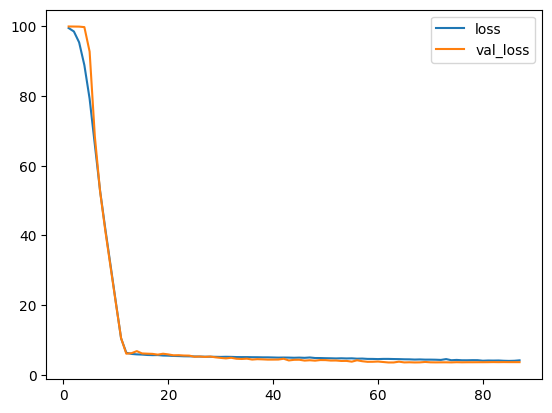

In [ ]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 1
history_df.loc[1:, ['loss', 'val_loss']].plot()


In [ ]:
lstm_pred = lstm.predict(X_test2)

1/1 [==============================] - 0s 345ms/step


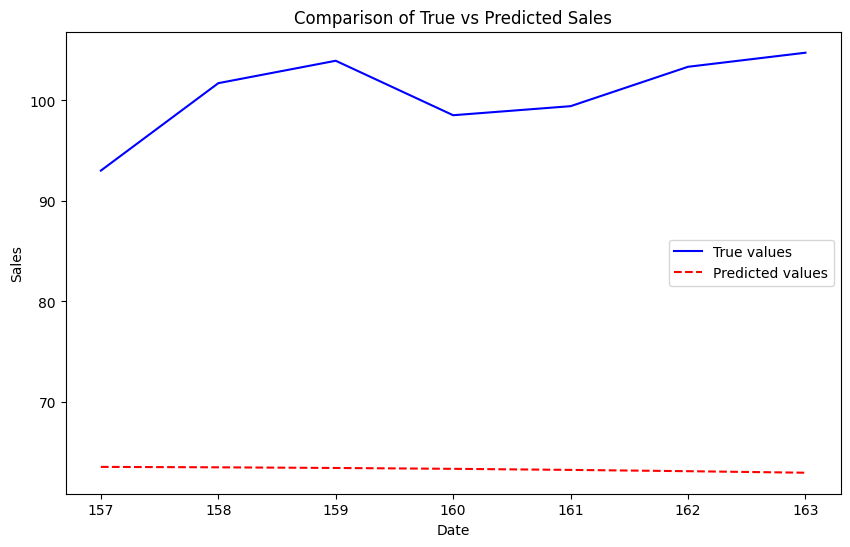

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test2.index, y_test2, label='True values', color='blue')
plt.plot(y_test2.index, lstm_pred, label='Predicted values', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Comparison of True vs Predicted Sales')
plt.legend()
plt.show()

- As expected, the model predictions are horrible. This is due the fact that LSTM models require a sufficient amount of data to learn meaningful patterns.